MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Fitting a model with 20 free scalar parameters with only 18 data points will result in a degenerate solution.


Discrete HMM Accuracy:  0.33
Continuous HMM Accuracy:0.33


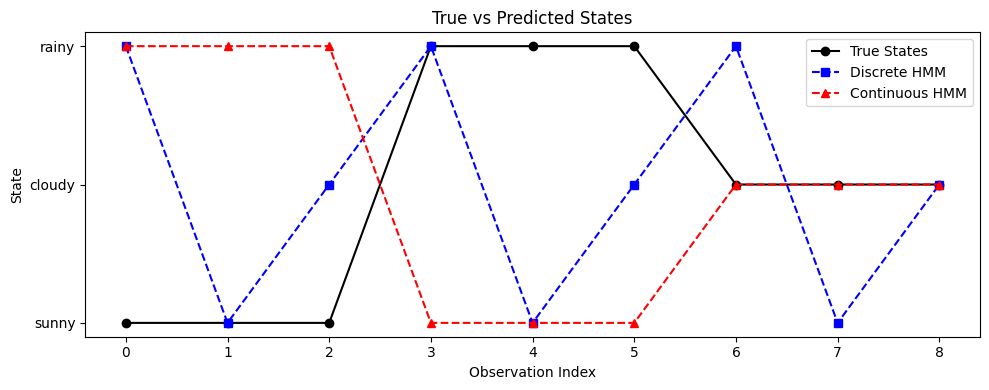

In [4]:
#Discrete and Conti. HMM for weather
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Simulated data (Temperature, Humidity)
observations = np.array([
    [30, 70], [28, 65], [35, 60],   # sunny
    [22, 80], [20, 85], [18, 90],   # rainy
    [25, 75], [24, 70], [26, 72],   # cloudy
])
true_states = ['sunny', 'sunny', 'sunny', 'rainy', 'rainy', 'rainy', 'cloudy', 'cloudy', 'cloudy']
state_map = {'sunny': 0, 'cloudy': 1, 'rainy': 2}
true_labels = np.array([state_map[s] for s in true_states])

# --- Discrete HMM ---
def bin_obs(obs):
    temp_bins = np.digitize(obs[:, 0], [20, 26, 32])
    hum_bins = np.digitize(obs[:, 1], [65, 75, 85])
    return (temp_bins * 4 + hum_bins).reshape(-1, 1)

disc_obs = bin_obs(observations)
disc_model = hmm.MultinomialHMM(n_components=3, n_iter=100)
disc_model.fit(disc_obs)
disc_pred = disc_model.predict(disc_obs)

# --- Continuous HMM ---
cont_model = hmm.GaussianHMM(n_components=3, n_iter=100, covariance_type='diag')
cont_model.fit(observations)
cont_pred = cont_model.predict(observations)

# --- Accuracy ---
disc_acc = accuracy_score(true_labels, disc_pred)
cont_acc = accuracy_score(true_labels, cont_pred)

print(f"Discrete HMM Accuracy:  {disc_acc:.2f}")
print(f"Continuous HMM Accuracy:{cont_acc:.2f}")

# --- Plot ---
plt.figure(figsize=(10, 4))
plt.plot(true_labels, 'ko-', label='True States')
plt.plot(disc_pred, 'bs--', label='Discrete HMM')
plt.plot(cont_pred, 'r^--', label='Continuous HMM')
plt.yticks([0, 1, 2], ['sunny', 'cloudy', 'rainy'])
plt.xlabel('Observation Index')
plt.ylabel('State')
plt.title('True vs Predicted States')
plt.legend()
plt.tight_layout()
plt.show()